# EN2550: Assignment 03 on Object Counting on a Conveyor Belt
 # Connected Component Analysis
In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

1. Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

In [ ]:
# import libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 

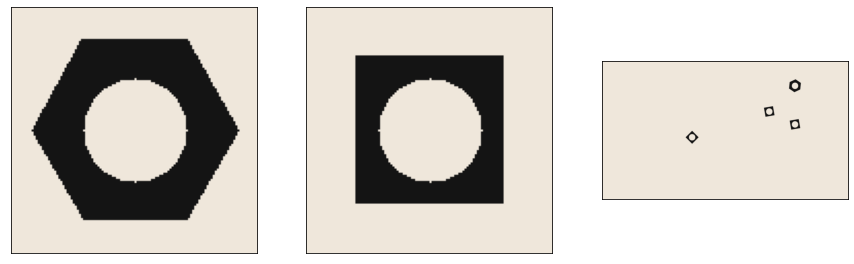

In [18]:
hexnut_template = cv.imread('assets/hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('assets/squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('assets/conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3, figsize = (15,5))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
ax[2].set_xticks([]), ax[2].set_yticks([])
plt.show()

2. Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

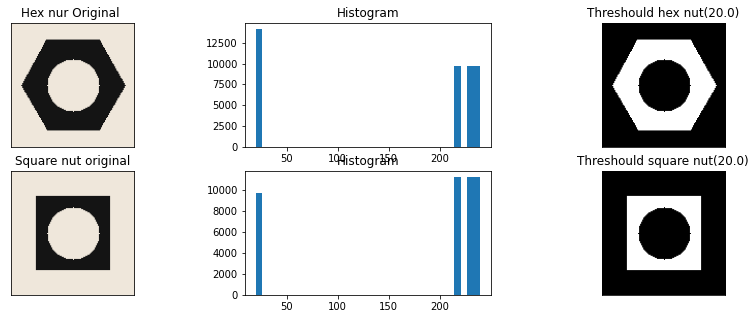

In [23]:
hex_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
hex_ret , hex_th = cv.threshold(hex_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
squre_gray = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
squre_ret , squre_th = cv.threshold(squre_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
#To detect contours object shoud be white in a blck background . Therefore inverted.

imgs = [hexnut_template, 0, hex_th,
        squarenut_template, 0, squre_th]

titles = ["Hex nur Original ", "Histogram", f"Threshould hex nut({hex_ret})",
          "Square nut original", "Histogram", f"Threshould square nut({squre_ret})" ]

plt.figure(figsize=(15,5))

for i in range(2):
    plt.subplot(2,3,i*3+1)
    plt.imshow(cv.cvtColor(imgs[i*3], cv.COLOR_BGR2RGB))
    plt.title(titles[i*3])
    plt.xticks([]), plt.yticks([])

    plt.subplot(2,3,i*3+2)
    plt.hist(imgs[i*3].ravel(), 35)
    plt.title(titles[i*3+1])


    plt.subplot(2,3,i*3+3)
    plt.imshow(cv.cvtColor(imgs[i*3+2], cv.COLOR_BGR2RGB))
    plt.title(titles[i*3+2])
    plt.xticks([]), plt.yticks([])

    






3. Carry out morphological closing to remove small holes inside the foreground. Use a 3×3 kernel. See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.

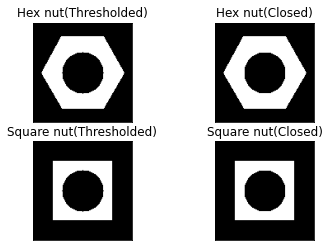

In [11]:
kernal =  np.ones((3,3),np.uint8)
closed_hexImg = cv.morphologyEx(hex_th,cv.MORPH_CLOSE, kernal)
closed_squreImg = cv.morphologyEx(squre_th,cv.MORPH_CLOSE, kernal)

images = [hex_th, closed_hexImg, squre_th, closed_squreImg]
titles = ["Hex nut(Thresholded)","Hex nut(Closed)","Square nut(Thresholded)","Square nut(Closed)"]

for i in range(2):
    plt.subplot(2,2,i*2+1), plt.imshow(cv.cvtColor(images[i*2], cv.COLOR_BGR2RGB))
    plt.title(titles[i*2]), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,i*2+2), plt.imshow(cv.cvtColor(images[i*2+1], cv.COLOR_BGR2RGB))
    plt.title(titles[i*2+1]), plt.xticks([]), plt.yticks([])

    